In [13]:
import pandas as pd
import numpy as np

# Set the random seed for reproducibility
np.random.seed(0)

# Generate a time index with 365 data points at daily intervals
time_index = pd.date_range(start='2022-01-01', periods=365, freq='D')

# Generate random production values for the time series
production_values = np.random.randint(low=500, high=1000, size=365)

# Generate random quality control data
def generate_quality_data():
    return np.random.choice(['Pass', 'Fail'], size=365, p=[0.9, 0.1])

quality_data = generate_quality_data()

# Generate random manufacturing metrics
def generate_metrics():
    return np.random.uniform(low=0.0, high=1.0, size=365)

metric1 = generate_metrics()
metric2 = generate_metrics()

# Create a DataFrame with the time index and manufacturing data
df = pd.DataFrame({'Production': production_values,
                   'Quality': quality_data,
                   'Metric1': metric1,
                   'Metric2': metric2}, index=time_index)

# Display the first few rows of the generated manufacturing time series dataset
print(df.head())

# Save the manufacturing time series dataset as a CSV file
df.to_csv('manufacturing_dataset.csv', index_label='Timestamp')


            Production Quality   Metric1   Metric2
2022-01-01         672    Pass  0.542457  0.306383
2022-01-02         547    Pass  0.991142  0.988749
2022-01-03         617    Fail  0.383103  0.574032
2022-01-04         692    Pass  0.806669  0.944949
2022-01-05         823    Pass  0.461007  0.559774


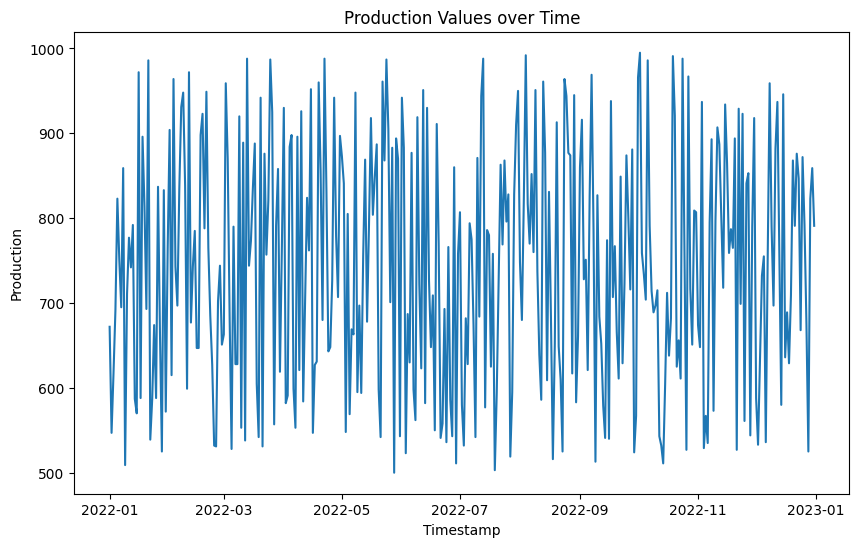

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the manufacturing time series dataset
df = pd.read_csv('manufacturing_dataset.csv', parse_dates=['Timestamp'], index_col='Timestamp')

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a line plot using Seaborn
sns.lineplot(data=df['Production'])

# Set the plot title and axes labels
plt.title('Production Values over Time')
plt.xlabel('Timestamp')
plt.ylabel('Production')

# Display the plot
plt.show()


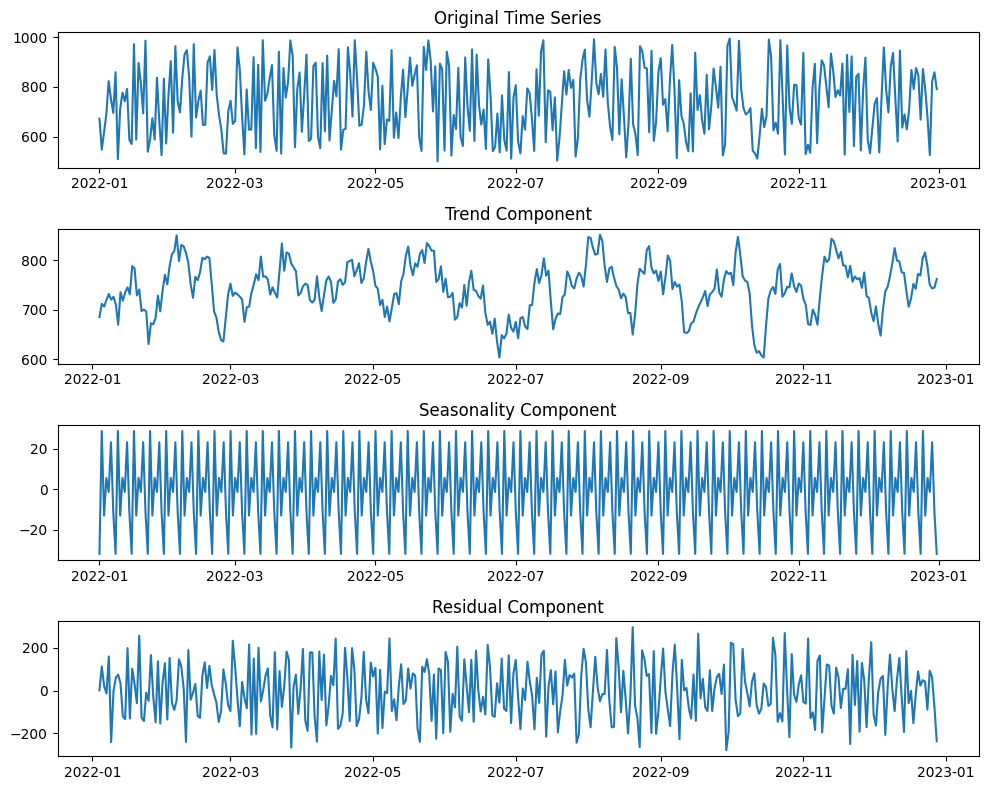

In [15]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Load the manufacturing time series dataset
df = pd.read_csv('manufacturing_dataset.csv', parse_dates=['Timestamp'], index_col='Timestamp')

# Perform seasonal decomposition
decomposition = seasonal_decompose(df['Production'], model='additive')

# Access the individual components: trend, seasonality, and residuals
trend = decomposition.trend
seasonality = decomposition.seasonal
residuals = decomposition.resid

# Plot the original time series and the decomposed components
plt.figure(figsize=(10, 8))

plt.subplot(4, 1, 1)
plt.plot(df['Production'])
plt.title('Original Time Series')

plt.subplot(4, 1, 2)
plt.plot(trend)
plt.title('Trend Component')

plt.subplot(4, 1, 3)
plt.plot(seasonality)
plt.title('Seasonality Component')

plt.subplot(4, 1, 4)
plt.plot(residuals)
plt.title('Residual Component')

plt.tight_layout()
plt.show()


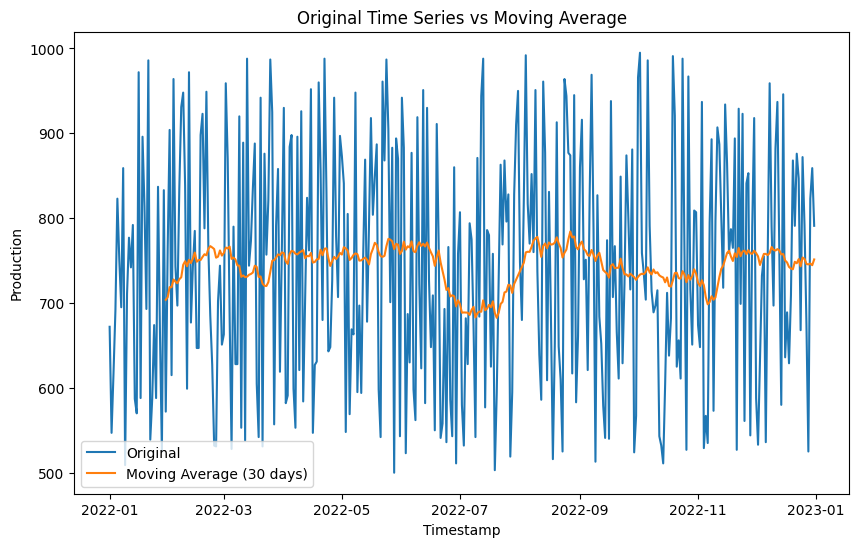

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the manufacturing time series dataset
df = pd.read_csv('manufacturing_dataset.csv', parse_dates=['Timestamp'], index_col='Timestamp')

# Compute the moving average with a window size of your choice
window_size = 30
moving_average = df['Production'].rolling(window_size).mean()

# Plot the original time series and the moving average
plt.figure(figsize=(10, 6))
plt.plot(df['Production'], label='Original')
plt.plot(moving_average, label=f'Moving Average ({window_size} days)')
plt.legend()
plt.title('Original Time Series vs Moving Average')
plt.xlabel('Timestamp')
plt.ylabel('Production')
plt.show()


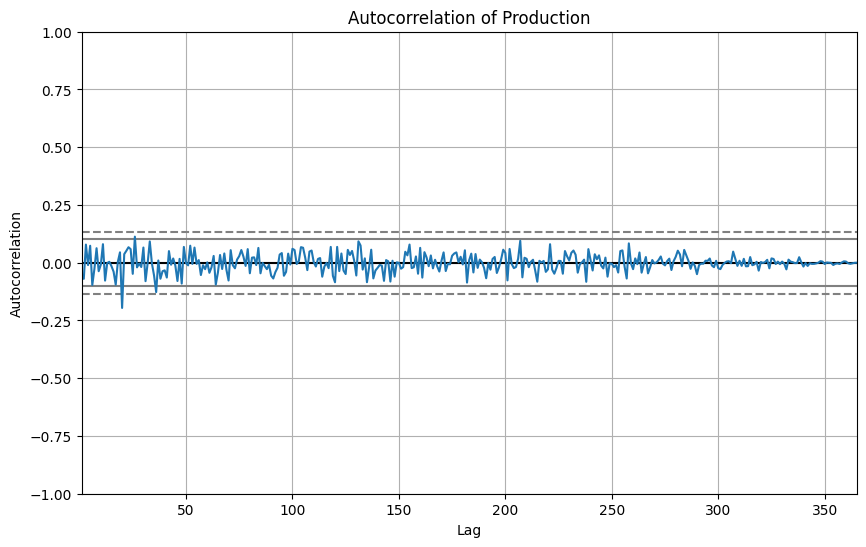

In [17]:
import pandas as pd
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt

# Load the manufacturing time series dataset
df = pd.read_csv('manufacturing_dataset.csv', parse_dates=['Timestamp'], index_col='Timestamp')

# Plot the autocorrelation
plt.figure(figsize=(10, 6))
autocorrelation_plot(df['Production'])
plt.title('Autocorrelation of Production')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


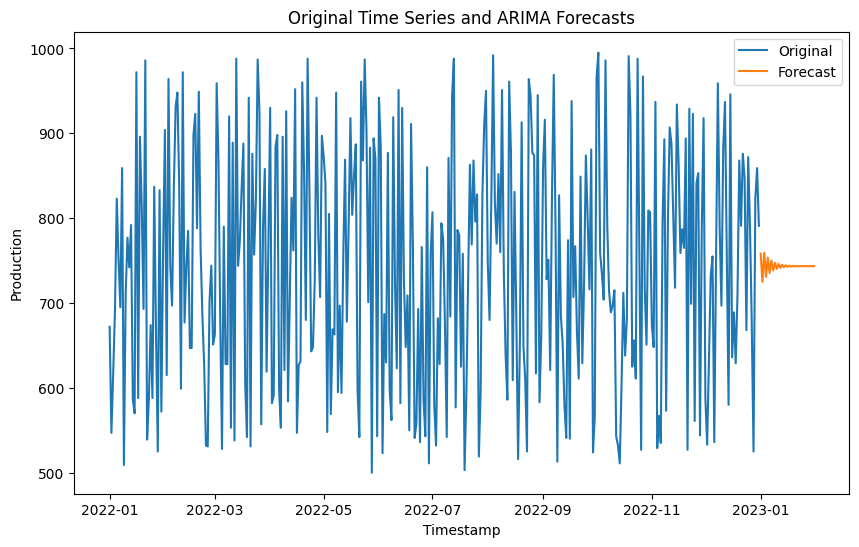

In [18]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Load the manufacturing time series dataset
df = pd.read_csv('manufacturing_dataset.csv', parse_dates=['Timestamp'], index_col='Timestamp')

# Fit the ARIMA model
model = ARIMA(df['Production'], order=(2, 1, 2))
model_fit = model.fit()

# Make forecasts
forecast = model_fit.predict(start=len(df), end=len(df)+30)

# Plot the original time series and the forecasts
plt.figure(figsize=(10, 6))
plt.plot(df['Production'], label='Original')
plt.plot(forecast, label='Forecast')
plt.legend()
plt.title('Original Time Series and ARIMA Forecasts')
plt.xlabel('Timestamp')
plt.ylabel('Production')
plt.show()


The resulting plot shows two lines: the original time series data and the forecasted values. Here's a breakdown of what the plot represents:

The blue line represents the original time series data, showing the actual production values observed over time.
The orange line represents the forecasted values by the ARIMA model. These values represent the model's predictions for the future based on the patterns and trends it learned from the historical data.

By comparing the original time series with the forecasted values, you can evaluate how well the ARIMA model captures the underlying patterns and trends in the manufacturing data. Here are a few key points to consider when interpreting the plot:

Accuracy of Forecasts:
 Assess how closely the forecasted values align with the actual data points. Ideally, the forecasted values should closely follow the observed data, capturing both the general trend and the specific fluctuations.

Trend:
Examine whether the forecasted values capture the overall trend of the time series. The model should be able to identify if the production is increasing, decreasing, or staying relatively stable over time.

Seasonality and Patterns: Check if the forecasted values capture any recurring patterns or seasonal components present in the manufacturing data. This is particularly relevant for industries where production may have cyclical or seasonal variations.

Forecast Horizon: Consider the forecast horizon, i.e., the time period for which the model is making predictions. Evaluate how far into the future the forecasts extend and assess the model's performance over this horizon.